In [8]:
system('sudo apt install libudunits2-dev')
if (!requireNamespace("remotes", quietly = TRUE)) { install.packages("remotes") }
install.packages ("devtools")
devtools::install_github("physicsland/ezids")
install.packages("psych")
install.packages("randomForest")
install.packages("caret")
install.packages("ROSE")
install.packages("data.table")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Skipping install of 'ezids' from a github remote, the SHA1 (f2662298) has not changed since last install.
  Use `force = TRUE` to force installation

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [37]:
install.packages("skimr")
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’




In [12]:
library(data.table)
data <- fread("sample_data/cleaned_accepted_2013_to_2018Q4.csv")

df <- data[, c("issue_d", "loan_amnt", "int_rate", "grade", "sub_grade", "emp_length", "annual_inc", "dti", "fico_range_low", "fico_range_high", "last_fico_range_high", "last_fico_range_low", "open_acc_6m","loan_status")]

library(skimr)

skim(df)


Warning message in fread("sample_data/cleaned_accepted_2013_to_2018Q4.csv"):
“Discarded single-line footer: <<46743863,5000.0,5000.0,5000.0, 36 months,11.53,164.96,B,B5,account manager,10+ years,RENT,55000.0,Source Verified,2015-05-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=46743863,debt_consolidation,Debt consolidation,920xx,CA,34.96,1.0,Aug-2004,735.0,739.0,0.0,14.0,9.0,1.0,954.0,4.3,25.0,f,0.0,0.0,5927.8218819567,5927.82,5000.0,927.82,0.0,0.0,0.0,Mar-2018,490.55,,Mar-2019,709.0,705.0,0.0,1.0,Individual,0.0,0.0,56330.0,,,,,,,,,,,,22000.0,,,,8.0,6259.0,2541.0,15.3,0.0,0.0,>>”


── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             306451
Number of columns          14    
Key                        NULL  
_______________________          
Column type frequency:           
  character                4     
  Date                     1     
  numeric                  9     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 grade                 0             1   1   1     0        7          0
2 sub_grade             0             1   2   2     0       35          0
3 emp_length            0             1   0   9 17541       12          0
4 loan_status           0             1   7  18     0        7          0

── Variable type: Date ─────────────────────────────────────────────────────────
  skim_variable n

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 21' in coercion to 'logical(1)'


In [13]:
# Convert specific columns to factors
# Remove the first letter from sub_grade
df$sub_grade <- substr(df$sub_grade, 2, nchar(df$sub_grade))
df$grade <- factor(df$grade)
df$sub_grade <- factor(df$sub_grade)
df$emp_length <- factor(df$emp_length)
df$loan_status <- factor(df$loan_status)
str(df)

Classes ‘data.table’ and 'data.frame':	306451 obs. of  14 variables:
 $ issue_d             : IDate, format: "2015-12-01" "2015-12-01" ...
 $ loan_amnt           : num  3600 24700 20000 35000 10400 ...
 $ int_rate            : num  14 12 10.8 14.8 22.4 ...
 $ grade               : Factor w/ 7 levels "A","B","C","D",..: 3 3 2 3 6 3 2 2 1 2 ...
 $ sub_grade           : Factor w/ 5 levels "1","2","3","4",..: 4 1 4 5 1 3 2 1 2 5 ...
 $ emp_length          : Factor w/ 12 levels "","< 1 year",..: 4 4 4 4 6 7 4 4 9 4 ...
 $ annual_inc          : num  55000 65000 63000 110000 104433 ...
 $ dti                 : num  5.91 16.06 10.78 17.06 25.37 ...
 $ fico_range_low      : num  675 715 695 785 695 690 680 705 685 700 ...
 $ fico_range_high     : num  679 719 699 789 699 694 684 709 689 704 ...
 $ last_fico_range_high: num  564 699 704 679 704 759 654 674 719 679 ...
 $ last_fico_range_low : num  560 695 700 675 700 755 650 670 715 675 ...
 $ open_acc_6m         : num  2 1 0 1 1 0 0 0 2 0 ...
 

In [14]:
df <- df[df$loan_status %in% c("Charged Off", "Fully Paid"), ]
df$loan_status <- factor(df$loan_status)
str(df)
head(df)

Classes ‘data.table’ and 'data.frame':	271550 obs. of  14 variables:
 $ issue_d             : IDate, format: "2015-12-01" "2015-12-01" ...
 $ loan_amnt           : num  3600 24700 20000 10400 11950 ...
 $ int_rate            : num  14 12 10.8 22.4 13.4 ...
 $ grade               : Factor w/ 7 levels "A","B","C","D",..: 3 3 2 6 3 2 2 1 2 3 ...
 $ sub_grade           : Factor w/ 5 levels "1","2","3","4",..: 4 1 4 1 3 2 1 2 5 2 ...
 $ emp_length          : Factor w/ 12 levels "","< 1 year",..: 4 4 4 6 7 4 4 9 4 6 ...
 $ annual_inc          : num  55000 65000 63000 104433 34000 ...
 $ dti                 : num  5.91 16.06 10.78 25.37 10.2 ...
 $ fico_range_low      : num  675 715 695 695 690 680 705 685 700 700 ...
 $ fico_range_high     : num  679 719 699 699 694 684 709 689 704 704 ...
 $ last_fico_range_high: num  564 699 704 704 759 654 674 719 679 704 ...
 $ last_fico_range_low : num  560 695 700 700 755 650 670 715 675 700 ...
 $ open_acc_6m         : num  2 1 0 1 0 0 0 2 0 1 ...
 $ 

issue_d,loan_amnt,int_rate,grade,sub_grade,emp_length,annual_inc,dti,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,open_acc_6m,loan_status
<IDate>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2015-12-01,3600,13.99,C,4,10+ years,55000,5.91,675,679,564,560,2,Fully Paid
2015-12-01,24700,11.99,C,1,10+ years,65000,16.06,715,719,699,695,1,Fully Paid
2015-12-01,20000,10.78,B,4,10+ years,63000,10.78,695,699,704,700,0,Fully Paid
2015-12-01,10400,22.45,F,1,3 years,104433,25.37,695,699,704,700,1,Fully Paid
2015-12-01,11950,13.44,C,3,4 years,34000,10.20,690,694,759,755,0,Fully Paid
2015-12-01,20000,9.17,B,2,10+ years,180000,14.67,680,684,654,650,0,Fully Paid


In [15]:
library(data.table)

# Identify numerical columns
numerical_columns <- c(
  "loan_amnt", "int_rate", "annual_inc", "dti",
  "fico_range_low", "fico_range_high",
  "last_fico_range_low", "last_fico_range_high",
  "open_acc_6m"
)

# Standardize numerical columns
df[, (numerical_columns) := lapply(.SD, scale), .SDcols = numerical_columns]


In [16]:
freq <- table(df$loan_status)
percentages <- prop.table(freq) * 100
percentages



Charged Off  Fully Paid 
   20.13699    79.86301 

In [19]:
library(caret)

# Set seed for reproducibility
set.seed(123)

# Split the data into training (70%) and the rest (30%)
train_indices <- createDataPartition(df$loan_status, p = 0.7, list = FALSE)

# Create training dataset
train <- df[train_indices, ]

# Remaining data for test and eval (30%)
remaining <- df[-train_indices, ]

# Split the remaining data into test (15%) and eval (15%)
test_indices <- createDataPartition(remaining$loan_status, p = 0.5, list = FALSE)

test <- remaining[test_indices, ]
eval <- remaining[-test_indices, ]

head(train)
head(test)
head(eval)

issue_d,loan_amnt,int_rate,grade,sub_grade,emp_length,annual_inc,dti,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,open_acc_6m,loan_status
<IDate>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2015-12-01,-1.2823318,0.4000046,C,4,10+ years,-0.2752114,-1.4488843,-0.62012717,-0.62011782,-1.36126838,-0.73417939,0.6930195,Fully Paid
2015-12-01,-0.4881980,2.3645589,F,1,3 years,0.3503563,0.7146368,0.03051086,0.03050563,0.34800900,0.31326893,-0.1032720,Fully Paid
2015-12-01,-0.3071822,0.2722854,C,3,4 years,-0.5409635,-0.9719313,-0.13214865,-0.13215023,1.01951083,0.72476649,-0.8995635,Fully Paid
2015-12-01,0.6329320,-0.7192804,B,2,10+ years,1.3066462,-0.4749663,-0.45746766,-0.45746196,-0.26244721,-0.06081975,-0.8995635,Fully Paid
2015-12-01,0.6329320,-0.8771879,B,1,10+ years,0.1044344,-0.1481034,0.35582988,0.35581735,-0.01826472,0.08881572,-0.8995635,Fully Paid
2015-12-01,-0.7684805,-0.1828596,B,5,10+ years,-0.4397246,1.7630440,0.19317037,0.19316149,0.04278090,0.12622459,-0.8995635,Fully Paid


issue_d,loan_amnt,int_rate,grade,sub_grade,emp_length,annual_inc,dti,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,open_acc_6m,loan_status
<IDate>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2015-12-01,0.6329320,-0.3454113,B,4,10+ years,-0.17397251,-0.9074482,0.03051086,0.03050563,0.3480090,0.3132689,-0.8995635,Fully Paid
2015-12-01,-0.5349118,-1.3416215,A,2,6 years,0.10443442,-0.6528509,-0.29480815,-0.29480610,0.5311459,0.4254955,0.6930195,Fully Paid
2015-12-01,-1.5392574,0.1422440,C,2,3 years,-0.16131765,1.7797207,0.19317037,0.19316149,0.3480090,0.3132689,-0.1032720,Fully Paid
2015-12-01,-1.0020493,-1.1094047,A,4,10+ years,0.29425733,-0.6295035,0.03051086,0.03050563,0.5311459,0.4254955,-0.8995635,Fully Paid
2015-12-01,-0.8619080,-0.1828596,B,5,10+ years,-0.05375133,-1.1642690,1.00646792,1.00644079,0.7753283,0.5751310,0.6930195,Fully Paid
2015-12-01,0.6329320,-0.5729838,B,3,5 years,-0.02211418,0.5011753,1.00646792,1.00644079,1.5078758,1.0240374,0.6930195,Fully Paid


issue_d,loan_amnt,int_rate,grade,sub_grade,emp_length,annual_inc,dti,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,open_acc_6m,loan_status
<IDate>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2015-12-01,1.1818186,-0.06442899,C,1,10+ years,-0.14866279,-0.3204291,0.6811489,0.6811291,0.2869634,0.2758601,-0.1032720,Fully Paid
2015-12-01,0.3993632,1.67487496,E,2,7 years,0.92700034,-1.0619854,-0.9454462,-0.9454295,-1.1170859,-0.5845439,0.6930195,Charged Off
2015-12-01,0.6329320,-1.61331516,A,1,9 years,-0.14866279,-0.0124664,4.5849771,4.5848697,1.6299670,1.0988552,-0.8995635,Fully Paid
2015-12-01,0.3526495,-1.61331516,A,1,< 1 year,0.14239900,0.8502738,2.7957225,2.7956553,1.2636933,0.8744020,-0.8995635,Fully Paid
2015-12-01,1.1292656,2.78022700,F,3,4 years,-0.02211418,0.2110011,-1.1081057,-1.1080854,-2.1548615,-4.9239727,0.6930195,Charged Off
2015-12-01,-0.8619080,0.81335057,D,1,< 1 year,-0.27521139,-0.1770096,-0.4574677,-0.4574620,0.1648721,0.2010423,-0.1032720,Fully Paid



Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:psych’:

    outlier


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


Loaded ROSE 0.0-4


Warning message:
“Use of `loan_status_df$percentage` is discouraged.
ℹ Use `percentage` instead.”


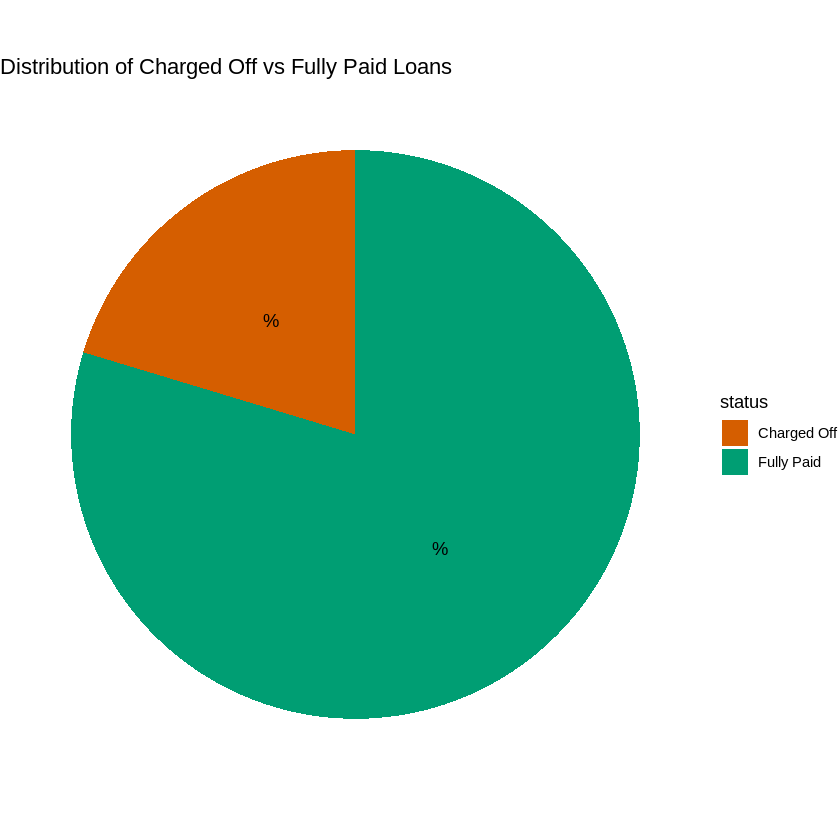

In [20]:

library(ezids)
library(data.table)
library(dplyr)
library(psych)
library(dplyr)
library(randomForest)
library(ggplot2)
library(caret) # For createDataPartition
library(ROSE) # For SMOTE


train_df_path = "sample_data/train.csv"
eval_df_path = "sample_data/eval.csv"
test_df_path = "sample_data/test.csv"
predict_df_path = "sample_data/predict.csv"

train_df = fread(train_df_path)
eval_df = fread(eval_df_path)
test_df = fread(test_df_path)
predict_df = fread(predict_df_path)

target_column <- "loan_status"

## Class Distribution

loan_status_counts <- table(train_df$loan_status)

loan_status_percentages <- round(100 * loan_status_counts / sum(loan_status_counts), 1)

loan_status_df <- data.frame(
  status = names(loan_status_counts),
  count = as.numeric(loan_status_counts),
  percentage = loan_status_percentages
)

ggplot(loan_status_df, aes(x = "", y = count, fill = status)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar(theta = "y") +
  labs(title = "Distribution of Charged Off vs Fully Paid Loans") +
  theme_void() +
  scale_fill_manual(values = c("Charged Off" = "#D55E00", "Fully Paid" = "#009E73")) +
  geom_text(aes(label = paste0(loan_status_df$percentage, "%")), position = position_stack(vjust = 0.5))



In [21]:
#Prepare data

describe_df <- function(df){
  print(summary(df))
  print(describe(df))
  print(colnames(df))
  sapply(df, class)
  missing_percentage <- sapply(df, function(x) sum(is.na(x)) / nrow(df) * 100)
  missing_percentage_df <- data.frame(Column = names(missing_percentage),
                                    Missing_Percentage = missing_percentage)
  print(missing_percentage_df)
}

prepare_and_clean_data <- function(df) {

  if (inherits(df, "data.table")) {
    df <- as.data.frame(df)
  }

  if (!is.data.frame(df)) {
    stop("Input is not a dataframe")
  }

  if ("loan_status" %in% names(df)) {
    df <- df[!is.na(df$loan_status), ]
    df$loan_status <- factor(df$loan_status)
  }

  if ("issue_d" %in% names(df)) {
    df <- df[, !(names(df) %in% "issue_d")]
  }

  if ("grade" %in% names(df)) {
    df$grade <- factor(df$grade)
  }
  if ("sub_grade" %in% names(df)) {
    df$sub_grade <- factor(df$sub_grade)
  }
  if ("emp_length" %in% names(df)) {
    df$emp_length <- factor(df$emp_length)
  }

  num_cols <- sapply(df, is.numeric)
  df[, num_cols] <- lapply(df[, num_cols, drop = FALSE], function(col) {
    col[is.na(col)] <- median(col, na.rm = TRUE)
    return(col)
  })

  factor_cols <- sapply(df, is.factor)
  df[, factor_cols] <- lapply(df[, factor_cols, drop = FALSE], function(col) {
    mode <- names(sort(table(col), decreasing = TRUE))[1]
    col[is.na(col)] <- mode
    return(col)
  })

  return(df)
}


train_df <- prepare_and_clean_data(train_df)
eval_df <- prepare_and_clean_data(eval_df)
test_df <- prepare_and_clean_data(test_df)
predict_df <- prepare_and_clean_data(predict_df)

describe_df(train_df)


   loan_amnt            int_rate         grade      sub_grade 
 Min.   :-1.547425   Min.   :-1.651225   A:149258   1:188135  
 1st Qu.:-0.748495   1st Qu.:-0.728567   B:251751   2:171823  
 Median :-0.291964   Median :-0.107228   C:251769   3:167430  
 Mean   : 0.000807   Mean   : 0.000207   D:131137   4:172690  
 3rd Qu.: 0.621098   3rd Qu.: 0.572297   E: 61099   5:171622  
 Max.   : 2.903753   Max.   : 3.685228   F: 20781             
                                         G:  5905             
     emp_length       annual_inc             dti           fico_range_low     
 10+ years:290836   Min.   : -1.08704   Min.   :-1.71567   Min.   :-1.122833  
 2 years  : 78549   1st Qu.: -0.43567   1st Qu.:-0.57457   1st Qu.:-0.805515  
 3 years  : 69417   Median : -0.16662   Median :-0.06028   Median :-0.170881  
 < 1 year : 69110   Mean   :  0.00014   Mean   : 0.00042   Mean   :-0.000181  
 1 year   : 56990   3rd Qu.:  0.20155   3rd Qu.: 0.51466   3rd Qu.: 0.463754  
 5 years  : 53000   Ma

Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”


                     vars      n  mean   sd median   min    max  range  skew
loan_amnt               1 871700  0.00 1.00  -0.29 -1.55   2.90   4.45  0.77
int_rate                2 871700  0.00 1.00  -0.11 -1.65   3.69   5.34  0.73
grade                   3 871700   NaN   NA     NA   Inf   -Inf   -Inf    NA
sub_grade               4 871700   NaN   NA     NA   Inf   -Inf   -Inf    NA
emp_length              5 871700   NaN   NA     NA   Inf   -Inf   -Inf    NA
annual_inc              6 871700  0.00 1.00  -0.17 -1.09 154.66 155.75 48.24
dti                     7 871700  0.00 1.00  -0.06 -1.72  86.20  87.91 28.04
fico_range_low          8 871700  0.00 1.00  -0.17 -1.12   4.75   5.87  1.33
fico_range_high         9 871700  0.00 1.00  -0.17 -1.12   4.78   5.90  1.33
last_fico_range_high   10 871700  0.00 1.00   0.21 -8.31   2.13  10.44 -0.60
last_fico_range_low    11 871700  0.00 1.00   0.23 -4.93   1.39   6.32 -3.22
open_acc_6m            12 871700 -0.02 0.66  -0.04 -0.87  13.19  14.06  2.56

In [35]:
#Checking multicollinearity

# numerical predictor variables
numerical_predictors <- train_df[, c("loan_amnt", "int_rate", "annual_inc", "dti",
                                      "fico_range_low", "fico_range_high",
                                      "last_fico_range_low", "last_fico_range_high",
                                      "open_acc_6m")]

# correlation matrix
cor_matrix <- cor(numerical_predictors)
print(cor_matrix)


                       loan_amnt    int_rate  annual_inc         dti
loan_amnt             1.00000000  0.12913125  0.31230327  0.02473166
int_rate              0.12913125  1.00000000 -0.07888651  0.14477110
annual_inc            0.31230327 -0.07888651  1.00000000 -0.14267530
dti                   0.02473166  0.14477110 -0.14267530  1.00000000
fico_range_low        0.10996137 -0.38386036  0.07406029 -0.04635803
fico_range_high       0.10996051 -0.38385743  0.07405991 -0.04636043
last_fico_range_low   0.04898892 -0.27361669  0.06210453 -0.04489085
last_fico_range_high  0.05379012 -0.35232840  0.06975417 -0.07366625
open_acc_6m          -0.01117870  0.11683255  0.02734600  0.02179306
                     fico_range_low fico_range_high last_fico_range_low
loan_amnt                0.10996137      0.10996051          0.04898892
int_rate                -0.38386036     -0.38385743         -0.27361669
annual_inc               0.07406029      0.07405991          0.06210453
dti                   

In [22]:
#Fetch N Random observations

handle_class_imbalance <- function(df, target_column) {

  sampled_df <- df %>% sample_n(1000)


  class_distribution <- table(sampled_df[[target_column]])


  minority_class <- names(sort(class_distribution))[which.min(class_distribution)]
  majority_class <- names(sort(class_distribution))[which.max(class_distribution)]


  minority_count <- class_distribution[minority_class]
  majority_count <- class_distribution[majority_class]


  if (minority_count < majority_count) {

    n_oversample <- majority_count - minority_count
    minority_df <- sampled_df[sampled_df[[target_column]] == minority_class, ]


    oversampled_minority <- minority_df[sample(1:nrow(minority_df), n_oversample, replace = TRUE), ]


    balanced_df <- rbind(sampled_df[sampled_df[[target_column]] == majority_class, ], oversampled_minority)
  } else {

    balanced_df <- sampled_df
  }

  return(balanced_df)
}



In [23]:
#Build Random Forest Model

train_and_evaluate_rf <- function(train_df, eval_df, target_column,
                                   ntree = 100, maxnodes = 50, maxdepth = 10,
                                   nodesize = 5, mtry = NULL,
                                   sampsize = NULL, classwt = NULL) {

  formula <- as.formula(paste(target_column, "~ ."))


  if (is.null(mtry)) {
    mtry <- sqrt(ncol(train_df) - 1)
  }
  if (is.null(sampsize)) {
    sampsize <- nrow(train_df)
  }

  rf_model <- randomForest(formula, data = train_df, ntree = ntree, maxnodes = maxnodes,
                           maxdepth = maxdepth, nodesize = nodesize, mtry = mtry,
                           sampsize = sampsize, classwt = classwt, importance = TRUE)



  train_pred <- predict(rf_model, train_df, type = "response")
  train_accuracy <- mean(train_pred == train_df[[target_column]])


  eval_pred <- predict(rf_model, eval_df, type = "response")
  eval_accuracy <- mean(eval_pred == eval_df[[target_column]])


  train_confusion_matrix <- table(Predicted = train_pred, Actual = train_df[[target_column]])
  eval_confusion_matrix <- table(Predicted = eval_pred, Actual = eval_df[[target_column]])




  return(list(
    train_accuracy = train_accuracy,
    eval_accuracy = eval_accuracy,
    train_confusion_matrix = train_confusion_matrix,
    eval_confusion_matrix = eval_confusion_matrix,
    model = rf_model
  ))
}



In [24]:
calculate_metrics <- function(results) {

  train_conf_matrix <- results$train_confusion_matrix
  eval_conf_matrix <- results$eval_confusion_matrix


  calculate_class_metrics <- function(conf_matrix, class) {
    tp <- conf_matrix[class, class]  # True Positives
    fn <- conf_matrix[class, -class]  # False Negatives
    fp <- conf_matrix[-class, class]  # False Positives
    tn <- sum(conf_matrix) - tp - fn - fp  # True Negatives

    precision <- tp / (tp + fp)
    recall <- tp / (tp + fn)
    f1 <- 2 * (precision * recall) / (precision + recall)

    return(c(precision, recall, f1))
  }


  class_names <- c("Charged Off", "Fully Paid")

  train_metrics <- sapply(1:2, function(i) calculate_class_metrics(train_conf_matrix, i))
  eval_metrics <- sapply(1:2, function(i) calculate_class_metrics(eval_conf_matrix, i))


  result_list <- list(
    train_precision_charged_off = train_metrics[1, 1],
    train_recall_charged_off = train_metrics[2, 1],
    train_f1_charged_off = train_metrics[3, 1],

    train_precision_fully_paid = train_metrics[1, 2],
    train_recall_fully_paid = train_metrics[2, 2],
    train_f1_fully_paid = train_metrics[3, 2],

    eval_precision_charged_off = eval_metrics[1, 1],
    eval_recall_charged_off = eval_metrics[2, 1],
    eval_f1_charged_off = eval_metrics[3, 1],

    eval_precision_fully_paid = eval_metrics[1, 2],
    eval_recall_fully_paid = eval_metrics[2, 2],
    eval_f1_fully_paid = eval_metrics[3, 2]
  )

  return(result_list)
}


Training Random Forest with 150 trees...
Training Random Forest with 170 trees...
Training Random Forest with 190 trees...
Training Random Forest with 210 trees...
Training Random Forest with 230 trees...
Training Random Forest with 250 trees...
Training Random Forest with 270 trees...
Training Random Forest with 290 trees...
Training Random Forest with 310 trees...
Training Random Forest with 330 trees...
Training Random Forest with 350 trees...
Training Random Forest with 370 trees...
Training Random Forest with 390 trees...
Training Random Forest with 410 trees...
Training Random Forest with 430 trees...
Training Random Forest with 450 trees...
Training Random Forest with 470 trees...
Training Random Forest with 490 trees...


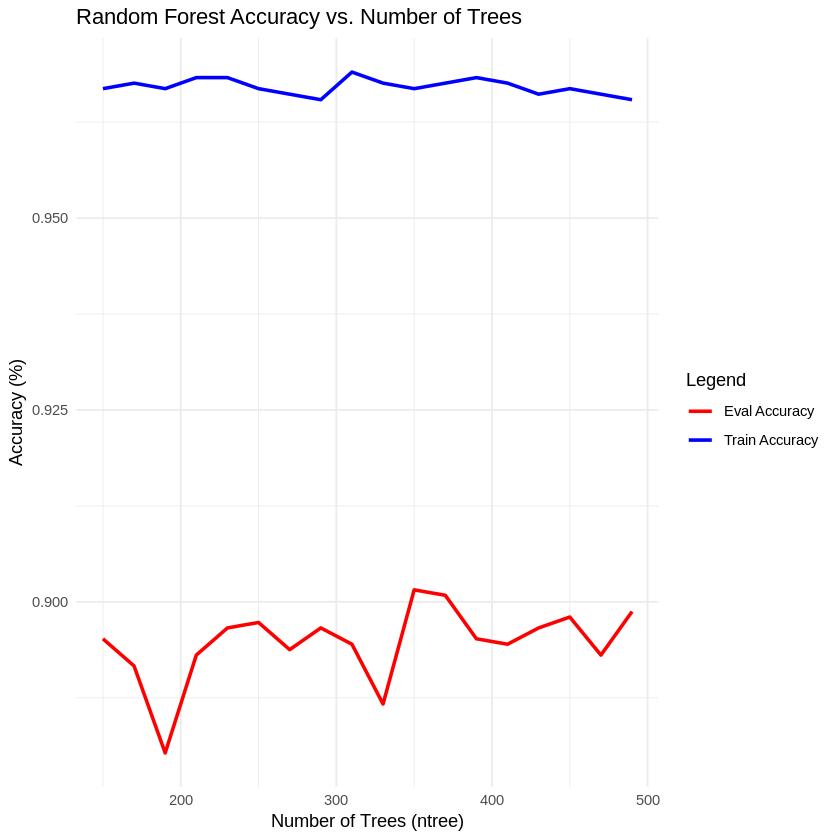

In [26]:
#Hyper Parameter tuning #1

target_column <- "loan_status"
sample_train_df <- handle_class_imbalance(train_df, target_column)
sample_eval_df <- handle_class_imbalance(eval_df, target_column)

ntree_list <- seq(150, 500, by = 20)
train_accuracies <- c()
eval_accuracies <- c()

for (ntree in ntree_list) {
  cat("Training Random Forest with", ntree, "trees...\n")

  rf_model <- train_and_evaluate_rf(sample_train_df, sample_eval_df, target_column, ntree)

    train_accuracies <- c(train_accuracies, rf_model$train_accuracy)
  eval_accuracies <- c(eval_accuracies, rf_model$eval_accuracy)
}

accuracy_df <- data.frame(
  ntree = ntree_list,
  Train_Accuracy = train_accuracies,
  Eval_Accuracy = eval_accuracies
)

library(ggplot2)

ggplot(accuracy_df, aes(x = ntree)) +
  geom_line(aes(y = Train_Accuracy, color = "Train Accuracy"), size = 1) +
  geom_line(aes(y = Eval_Accuracy, color = "Eval Accuracy"), size = 1) +
  labs(title = "Random Forest Accuracy vs. Number of Trees",
       x = "Number of Trees (ntree)",
       y = "Accuracy (%)") +
  scale_color_manual(name = "Legend", values = c("Train Accuracy" = "blue", "Eval Accuracy" = "red")) +
  theme_minimal()

Training Random Forest with 80 max nodes...
Training Random Forest with 85 max nodes...
Training Random Forest with 90 max nodes...
Training Random Forest with 95 max nodes...
Training Random Forest with 100 max nodes...
Training Random Forest with 105 max nodes...
Training Random Forest with 110 max nodes...
Training Random Forest with 115 max nodes...
Training Random Forest with 120 max nodes...
Training Random Forest with 125 max nodes...
Training Random Forest with 130 max nodes...
Training Random Forest with 135 max nodes...
Training Random Forest with 140 max nodes...
Training Random Forest with 145 max nodes...
Training Random Forest with 150 max nodes...
Training Random Forest with 155 max nodes...
Training Random Forest with 160 max nodes...
Training Random Forest with 165 max nodes...
Training Random Forest with 170 max nodes...
Training Random Forest with 175 max nodes...
Training Random Forest with 180 max nodes...
Training Random Forest with 185 max nodes...
Training Rando

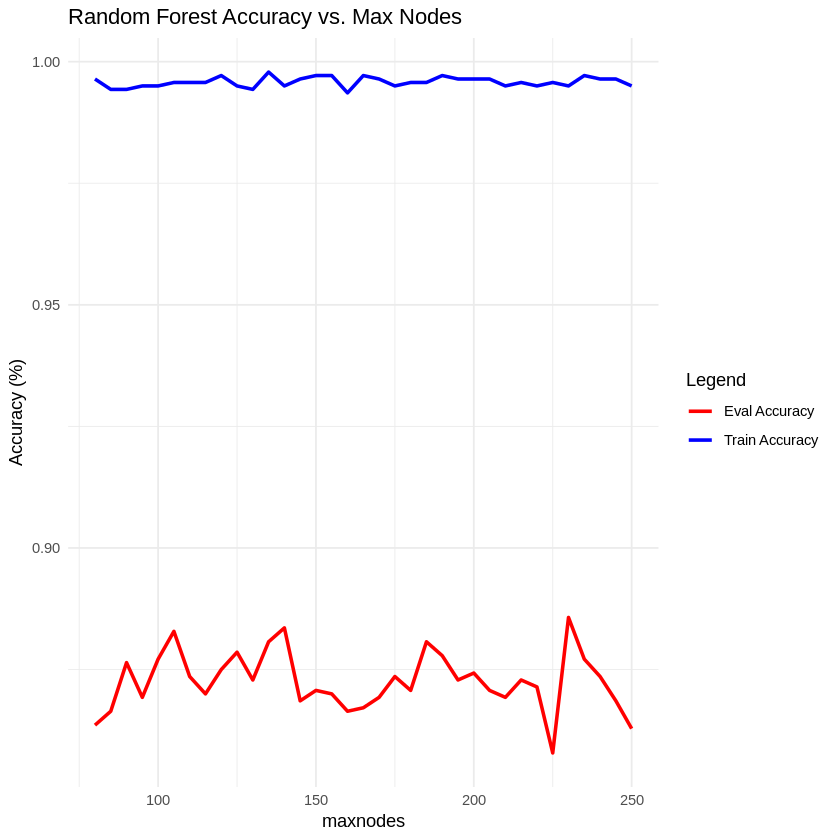

In [27]:
#Hyper parameter tuning #2

target_column <- "loan_status"
sample_train_df <- handle_class_imbalance(train_df, target_column)
sample_eval_df <- handle_class_imbalance(eval_df, target_column)

maxnodes_list <- seq(80, 250, by = 5)
train_accuracies <- c()
eval_accuracies <- c()

for (maxnodes in maxnodes_list) {
  cat("Training Random Forest with", maxnodes, "max nodes...\n")

  rf_model <- train_and_evaluate_rf(sample_train_df, sample_eval_df, target_column, ntree=120, maxdepth = 25, maxnodes = maxnodes)

  train_accuracies <- c(train_accuracies, rf_model$train_accuracy)
  eval_accuracies <- c(eval_accuracies, rf_model$eval_accuracy)
}

accuracy_df <- data.frame(
  maxnodes = maxnodes_list,
  Train_Accuracy = train_accuracies,
  Eval_Accuracy = eval_accuracies
)


library(ggplot2)

ggplot(accuracy_df, aes(x = maxnodes)) +
  geom_line(aes(y = Train_Accuracy, color = "Train Accuracy"), size = 1) +
  geom_line(aes(y = Eval_Accuracy, color = "Eval Accuracy"), size = 1) +
  labs(title = "Random Forest Accuracy vs. Max Nodes",
       x = "maxnodes",
       y = "Accuracy (%)") +
  scale_color_manual(name = "Legend", values = c("Train Accuracy" = "blue", "Eval Accuracy" = "red")) +
  theme_minimal()



Training Random Forest with 1  chareoff_class_wt...
Training Random Forest with 2  chareoff_class_wt...
Training Random Forest with 3  chareoff_class_wt...
Training Random Forest with 4  chareoff_class_wt...
Training Random Forest with 5  chareoff_class_wt...
Training Random Forest with 6  chareoff_class_wt...
Training Random Forest with 7  chareoff_class_wt...
Training Random Forest with 8  chareoff_class_wt...
Training Random Forest with 9  chareoff_class_wt...
Training Random Forest with 10  chareoff_class_wt...


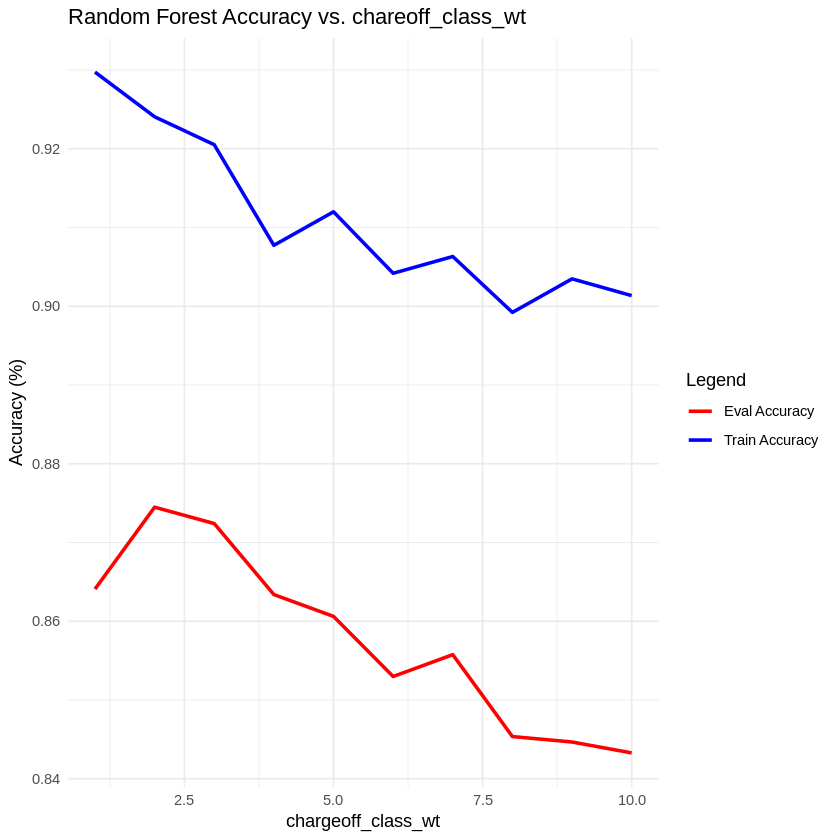

In [45]:
#Hyper parameter tuning 3
target_column <- "loan_status"
sample_train_df <- handle_class_imbalance(train_df, target_column)
sample_eval_df <- handle_class_imbalance(eval_df, target_column)

chareoff_class_wt_list <- seq(1, 10, by = 1)
train_accuracies <- c()
eval_accuracies <- c()

for (chareoff_class_wt in chareoff_class_wt_list) {
  cat("Training Random Forest with", chareoff_class_wt, " chareoff_class_wt...\n")

  rf_model <- train_and_evaluate_rf(sample_train_df, sample_eval_df, target_column, ntree=120, maxdepth = 25,
                                    maxnodes = 20, classwt = c("Charged Off" = chareoff_class_wt, "Fully Paid" = 1))

  train_accuracies <- c(train_accuracies, rf_model$train_accuracy)
  eval_accuracies <- c(eval_accuracies, rf_model$eval_accuracy)
}

accuracy_df <- data.frame(
  chareoff_class_wt = chareoff_class_wt_list,
  Train_Accuracy = train_accuracies,
  Eval_Accuracy = eval_accuracies
)

library(ggplot2)

ggplot(accuracy_df, aes(x = chareoff_class_wt)) +
  geom_line(aes(y = Train_Accuracy, color = "Train Accuracy"), size = 1) +
  geom_line(aes(y = Eval_Accuracy, color = "Eval Accuracy"), size = 1) +
  labs(title = "Random Forest Accuracy vs. chareoff_class_wt",
       x = "chargeoff_class_wt",
       y = "Accuracy (%)") +
  scale_color_manual(name = "Legend", values = c("Train Accuracy" = "blue", "Eval Accuracy" = "red")) +
  theme_minimal()

Training Random Forest with Charged Off Weight: 1  Fully Paid Weight: 1 ...
Train - Charged Off Class:
Precision:  0.9601329 
Recall:  0.8784195 
F1:  0.9174603 
Training Random Forest with Charged Off Weight: 1  Fully Paid Weight: 2 ...
Train - Charged Off Class:
Precision:  0.9036545 
Recall:  0.8918033 
F1:  0.8976898 
Training Random Forest with Charged Off Weight: 1  Fully Paid Weight: 3 ...
Train - Charged Off Class:
Precision:  0.89701 
Recall:  0.9137056 
F1:  0.9052808 
Training Random Forest with Charged Off Weight: 1  Fully Paid Weight: 4 ...
Train - Charged Off Class:
Precision:  0.8903654 
Recall:  0.9273356 
F1:  0.9084746 
Training Random Forest with Charged Off Weight: 1  Fully Paid Weight: 5 ...
Train - Charged Off Class:
Precision:  0.8654485 
Recall:  0.9542125 
F1:  0.9076655 
Training Random Forest with Charged Off Weight: 1  Fully Paid Weight: 6 ...
Train - Charged Off Class:
Precision:  0.8438538 
Recall:  0.9639469 
F1:  0.8999114 
Training Random Forest with Ch

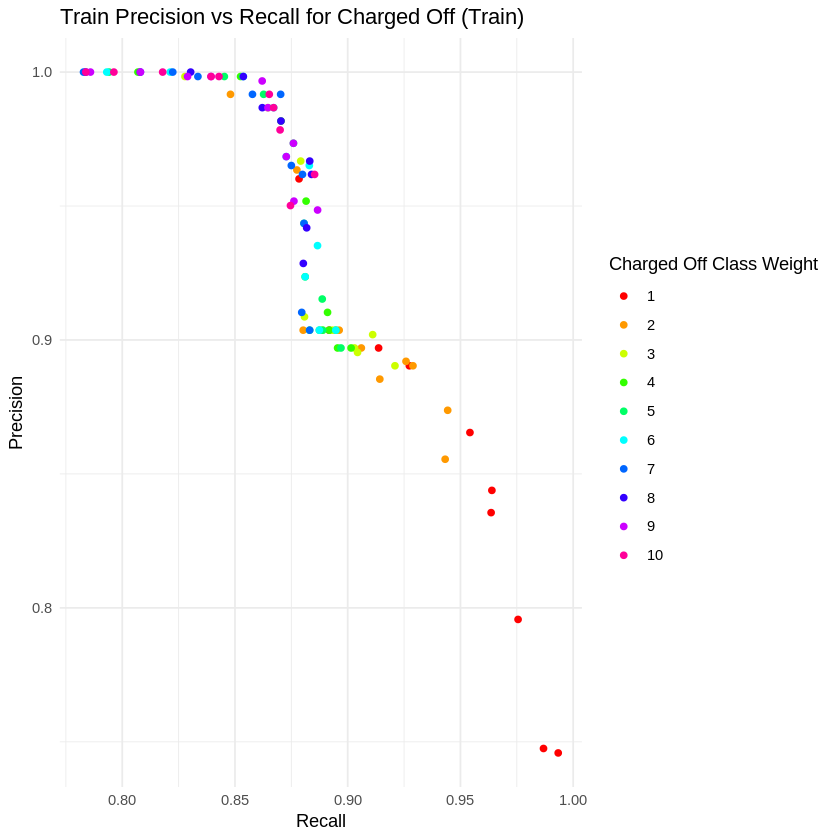

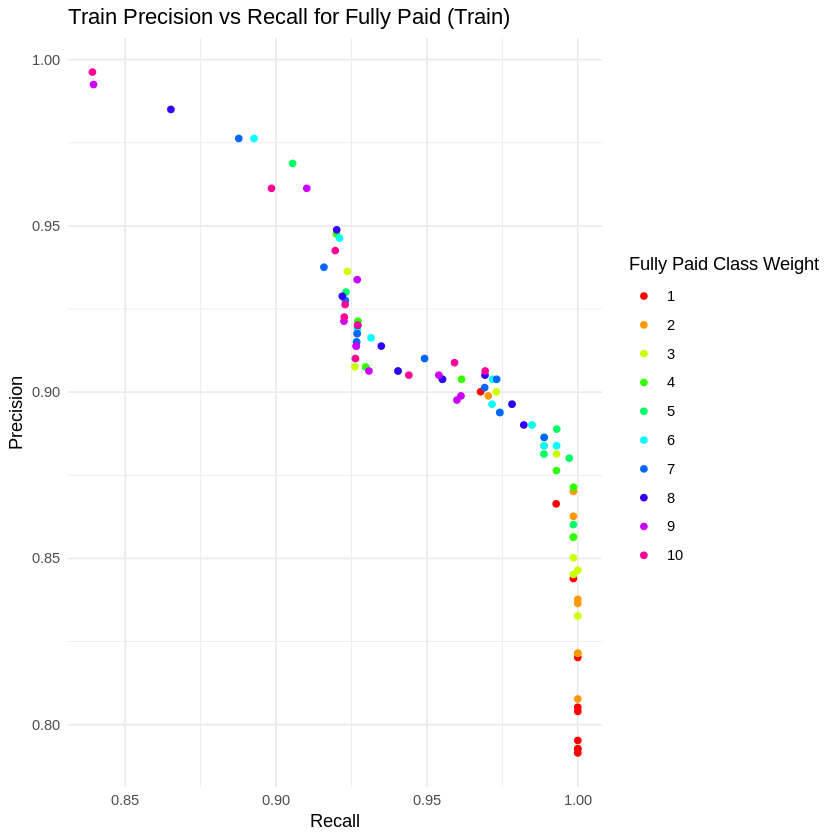

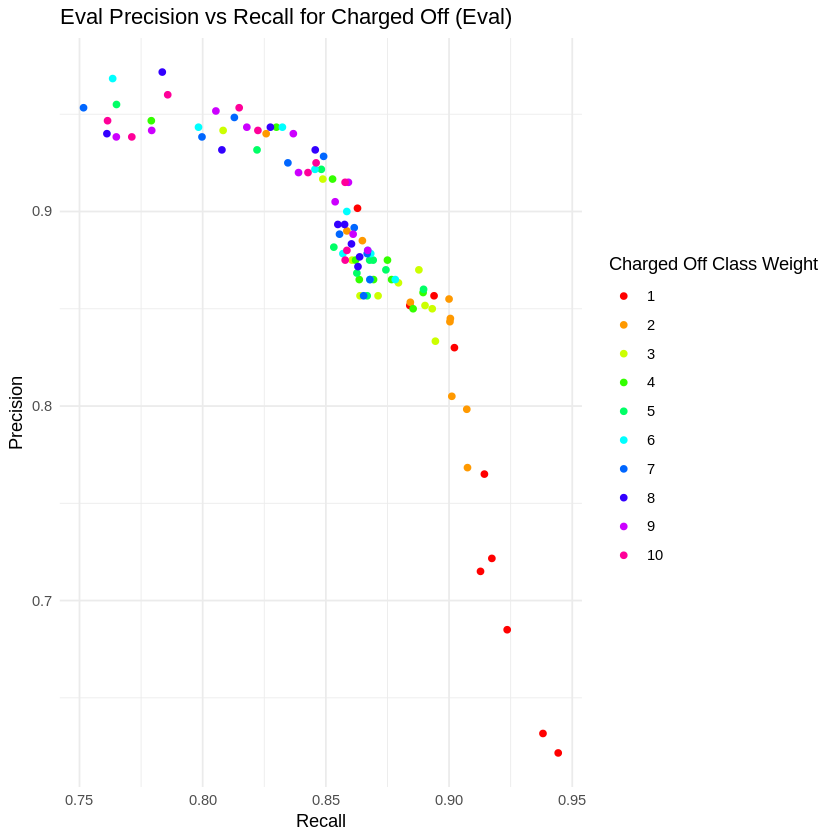

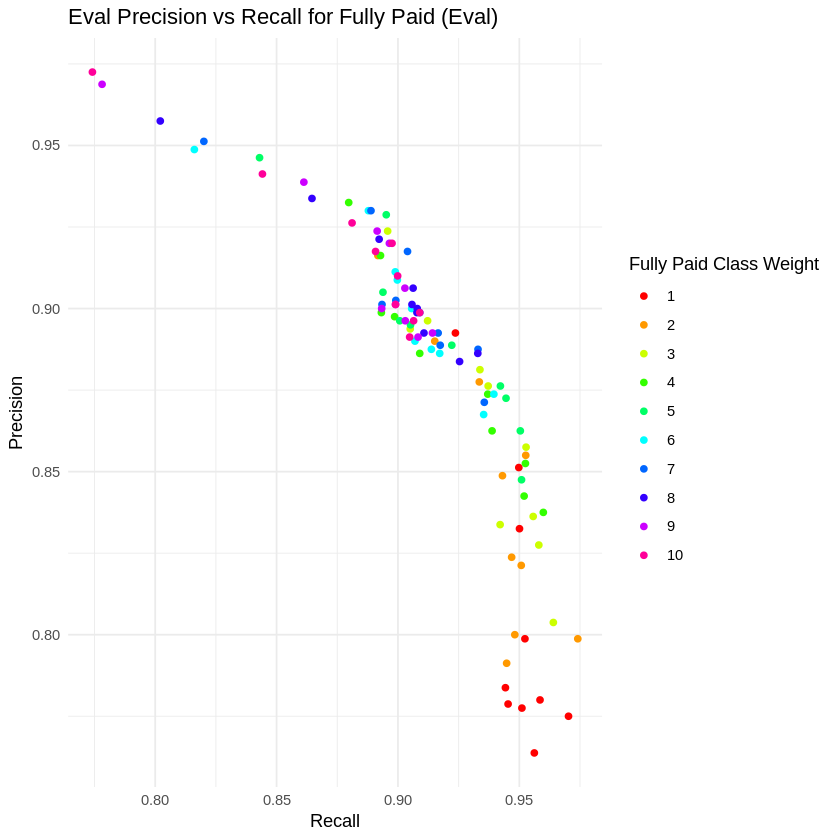

In [44]:
#Hyper parameter -graphics
chareoff_class_wt_list <- seq(1, 10, by = 1)
fully_paid_class_wt_list <- seq(1, 10, by = 1)

train_precision_charged_off <- c()
eval_precision_charged_off <- c()
train_recall_charged_off <- c()
eval_recall_charged_off <- c()

train_precision_fully_paid <- c()
eval_precision_fully_paid <- c()
train_recall_fully_paid <- c()
eval_recall_fully_paid <- c()


for (chareoff_class_wt in chareoff_class_wt_list) {
  for (fully_paid_class_wt in fully_paid_class_wt_list) {
    cat("Training Random Forest with Charged Off Weight:", chareoff_class_wt,
        " Fully Paid Weight:", fully_paid_class_wt, "...\n")


    rf_model <- train_and_evaluate_rf(
      sample_train_df, sample_eval_df, target_column,
      ntree = 120, maxdepth = 25, maxnodes = 20,
      classwt = c("Charged Off" = chareoff_class_wt, "Fully Paid" = fully_paid_class_wt)
    )

    metrics <- calculate_metrics(rf_model)


    cat("Train - Charged Off Class:\n")
    cat("Precision: ", metrics$train_precision_charged_off, "\n")
    cat("Recall: ", metrics$train_recall_charged_off, "\n")
    cat("F1: ", metrics$train_f1_charged_off, "\n")


    train_precision_charged_off <- c(train_precision_charged_off, metrics$train_precision_charged_off)
    eval_precision_charged_off <- c(eval_precision_charged_off, metrics$eval_precision_charged_off)

    train_recall_charged_off <- c(train_recall_charged_off, metrics$train_recall_charged_off)
    eval_recall_charged_off <- c(eval_recall_charged_off, metrics$eval_recall_charged_off)


    train_precision_fully_paid <- c(train_precision_fully_paid, metrics$train_precision_fully_paid)
    eval_precision_fully_paid <- c(eval_precision_fully_paid, metrics$eval_precision_fully_paid)

    train_recall_fully_paid <- c(train_recall_fully_paid, metrics$train_recall_fully_paid)
    eval_recall_fully_paid <- c(eval_recall_fully_paid, metrics$eval_recall_fully_paid)
  }
}

plot_data <- data.frame(
  chareoff_class_wt = rep(chareoff_class_wt_list, each = length(fully_paid_class_wt_list)),
  fully_paid_class_wt = rep(fully_paid_class_wt_list, times = length(chareoff_class_wt_list)),
  train_precision_charged_off = train_precision_charged_off,
  eval_precision_charged_off = eval_precision_charged_off,
  train_recall_charged_off = train_recall_charged_off,
  eval_recall_charged_off = eval_recall_charged_off,
  train_precision_fully_paid = train_precision_fully_paid,
  eval_precision_fully_paid = eval_precision_fully_paid,
  train_recall_fully_paid = train_recall_fully_paid,
  eval_recall_fully_paid = eval_recall_fully_paid
)


library(ggplot2)

# Plot Precision vs Recall for Charged Off class (Train vs Eval)
ggplot(plot_data, aes(x = train_recall_charged_off, y = train_precision_charged_off,
                     color = as.factor(chareoff_class_wt))) +
  geom_point() +
  labs(title = "Train Precision vs Recall for Charged Off (Train)",
       x = "Recall", y = "Precision") +
  scale_color_manual(name = "Charged Off Class Weight", values = rainbow(length(chareoff_class_wt_list))) +
  theme_minimal()

# Plot Precision vs Recall for Fully Paid class (Train vs Eval)
ggplot(plot_data, aes(x = train_recall_fully_paid, y = train_precision_fully_paid,
                     color = as.factor(fully_paid_class_wt))) +
  geom_point() +
  labs(title = "Train Precision vs Recall for Fully Paid (Train)",
       x = "Recall", y = "Precision") +
  scale_color_manual(name = "Fully Paid Class Weight", values = rainbow(length(fully_paid_class_wt_list))) +
  theme_minimal()

# Plot Eval Precision vs Recall for Charged Off class
ggplot(plot_data, aes(x = eval_recall_charged_off, y = eval_precision_charged_off,
                     color = as.factor(chareoff_class_wt))) +
  geom_point() +
  labs(title = "Eval Precision vs Recall for Charged Off (Eval)",
       x = "Recall", y = "Precision") +
  scale_color_manual(name = "Charged Off Class Weight", values = rainbow(length(chareoff_class_wt_list))) +
  theme_minimal()

# Plot Eval Precision vs Recall for Fully Paid class
ggplot(plot_data, aes(x = eval_recall_fully_paid, y = eval_precision_fully_paid,
                     color = as.factor(fully_paid_class_wt))) +
  geom_point() +
  labs(title = "Eval Precision vs Recall for Fully Paid (Eval)",
       x = "Recall", y = "Precision") +
  scale_color_manual(name = "Fully Paid Class Weight", values = rainbow(length(fully_paid_class_wt_list))) +
  theme_minimal()


In [46]:
#Train model on whole train dataset

final_results <- train_and_evaluate_rf(train_df, eval_df, target_column, ntree=120, maxdepth = 25, maxnodes = 20)
print(final_results)

metrics <- calculate_metrics(final_results)

cat("Train - Charged Off Class:\n")
cat("Precision: ", metrics$train_precision_charged_off, "\n")
cat("Recall: ", metrics$train_recall_charged_off, "\n")
cat("F1: ", metrics$train_f1_charged_off, "\n")

cat("\nTrain - Fully Paid Class:\n")
cat("Precision: ", metrics$train_precision_fully_paid, "\n")
cat("Recall: ", metrics$train_recall_fully_paid, "\n")
cat("F1: ", metrics$train_f1_fully_paid, "\n")

cat("\nEval - Charged Off Class:\n")
cat("Precision: ", metrics$eval_precision_charged_off, "\n")
cat("Recall: ", metrics$eval_recall_charged_off, "\n")
cat("F1: ", metrics$eval_f1_charged_off, "\n")

cat("\nEval - Fully Paid Class:\n")
cat("Precision: ", metrics$eval_precision_fully_paid, "\n")
cat("Recall: ", metrics$eval_recall_fully_paid, "\n")
cat("F1: ", metrics$eval_f1_fully_paid, "\n")

$train_accuracy
[1] 0.9044396

$eval_accuracy
[1] 0.9055045

$train_confusion_matrix
             Actual
Predicted     Charged Off Fully Paid
  Charged Off      147348      53411
  Fully Paid        29889     641052

$eval_confusion_matrix
             Actual
Predicted     Charged Off Fully Paid
  Charged Off       31607      11279
  Fully Paid         6372     137534

$model

Call:
 randomForest(formula = formula, data = train_df, ntree = ntree,      maxnodes = maxnodes, maxdepth = maxdepth, nodesize = nodesize,      mtry = mtry, sampsize = sampsize, classwt = classwt, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 120
No. of variables tried at each split: 3

        OOB estimate of  error rate: 9.59%
Confusion matrix:
            Charged Off Fully Paid class.error
Charged Off      147001      30236  0.17059643
Fully Paid        53317     641146  0.07677443

Train - Charged Off Class:
Precision:  0.8313614 
Recall:  0.733

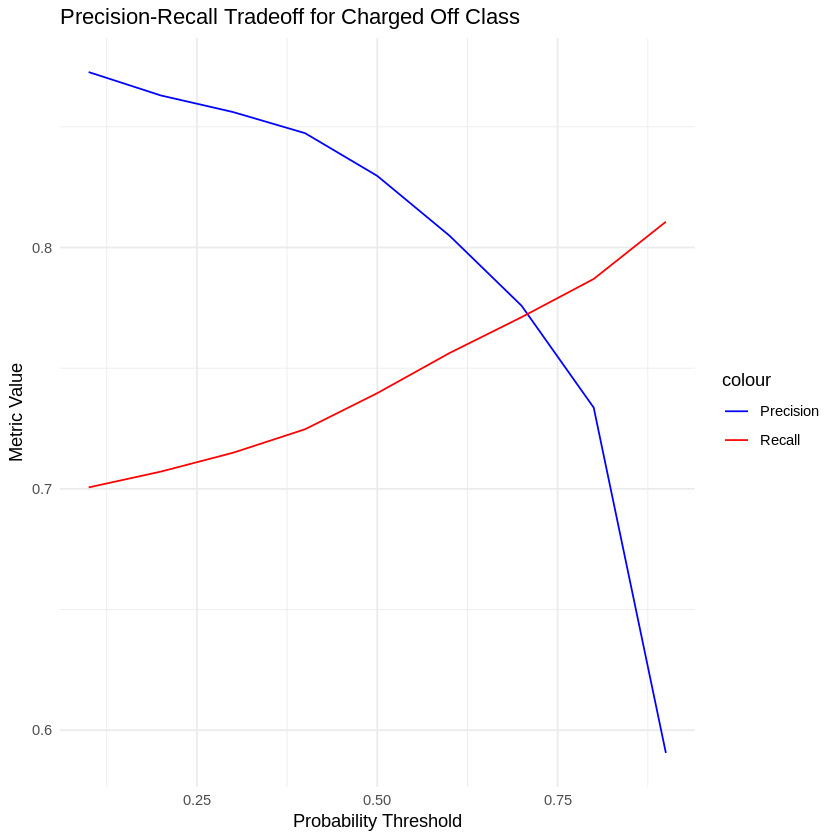

In [30]:

evaluate_thresholds <- function(model, eval_df, prob_thresholds, calculate_class_metrics) {
  if (!"loan_status" %in% names(eval_df)) {
    stop("The evaluation dataframe must contain a 'loan_status' column.")
  }


  threshold_results <- list()

  for (threshold in prob_thresholds) {

    predictions <- predict(model, eval_df, type = "prob")
    charged_off_probs <- predictions[, "Charged Off"]

    predicted_classes <- ifelse(charged_off_probs >= threshold, "Charged Off", "Fully Paid")

    conf_matrix <- table(predicted_classes, eval_df$loan_status)

    metrics <- calculate_class_metrics(conf_matrix, class = "Charged Off")

    threshold_results[[as.character(threshold)]] <- list(
      precision = metrics[1],
      recall = metrics[2],
      f1 = metrics[3]
    )
  }

  threshold_df <- do.call(rbind, lapply(threshold_results, function(x) {
    cbind(precision = x$precision, recall = x$recall, f1 = x$f1)
  }))

  threshold_df <- cbind(threshold = prob_thresholds, threshold_df)

  return(threshold_df)
}


calculate_class_metrics <- function(conf_matrix, class) {
  if (!(class %in% rownames(conf_matrix) && class %in% colnames(conf_matrix))) {
    stop("The specified class is not in the confusion matrix.")
  }

  class_index <- which(rownames(conf_matrix) == class)

  tp <- conf_matrix[class, class]  # True Positives
  fn <- sum(conf_matrix[class, -class_index])  # False Negatives
  fp <- sum(conf_matrix[-class_index, class])  # False Positives
  tn <- sum(conf_matrix) - tp - fn - fp  # True Negatives

  precision <- tp / (tp + fp)
  recall <- tp / (tp + fn)
  f1 <- 2 * (precision * recall) / (precision + recall)

  return(c(precision, recall, f1))
}


# Example Usage
# Assuming final_results$model is your Random Forest model,
# eval_df is the evaluation dataframe, and prob_thresholds is a vector of thresholds
prob_thresholds <- seq(0.1, 0.9, by = 0.1)
threshold_metrics <- evaluate_thresholds(final_results$model, eval_df, prob_thresholds, calculate_class_metrics)

# Visualize precision and recall trade-off
library(ggplot2)
ggplot(threshold_metrics, aes(x = threshold)) +
  geom_line(aes(y = precision, color = "Precision")) +
  geom_line(aes(y = recall, color = "Recall")) +
  labs(title = "Precision-Recall Tradeoff for Charged Off Class",
       x = "Probability Threshold",
       y = "Metric Value") +
  theme_minimal() +
  scale_color_manual(values = c("Precision" = "blue", "Recall" = "red"))



In [31]:
# Test accuracy

evaluate_model_metrics <- function(df, model, charge_off_threshold) {
  if (!"loan_status" %in% names(df)) {
    stop("The dataframe must contain a 'loan_status' column.")
  }


  pred_probs <- predict(model, df, type = "prob")

  predicted_classes <- apply(pred_probs, 1, function(row) {
    if (row["Charged Off"] >= charge_off_threshold) {
      return("Charged Off")
    } else {
      return("Fully Paid")
    }
  })

  predicted_classes <- factor(predicted_classes, levels = levels(df$loan_status))

  conf_matrix <- table(Predicted = predicted_classes, Actual = df$loan_status)

  calculate_metrics_for_class <- function(class_name) {
    tp <- conf_matrix[class_name, class_name]  # True Positives
    fn <- sum(conf_matrix[class_name, ]) - tp  # False Negatives
    fp <- sum(conf_matrix[, class_name]) - tp  # False Positives
    tn <- sum(conf_matrix) - tp - fn - fp  # True Negatives

    precision <- tp / (tp + fp)
    recall <- tp / (tp + fn)
    return(c(Precision = precision, Recall = recall))
  }

  class_metrics <- lapply(levels(df$loan_status), function(class_name) {
    calculate_metrics_for_class(class_name)
  })

  metrics_df <- do.call(rbind, class_metrics)
  rownames(metrics_df) <- levels(df$loan_status)

  return(metrics_df)
}

evaluate_model_metrics(test_df, final_results$model, 0.5)



,Precision,Recall
Charged Off,0.8300113,0.7344937
Fully Paid,0.9234279,0.9551277


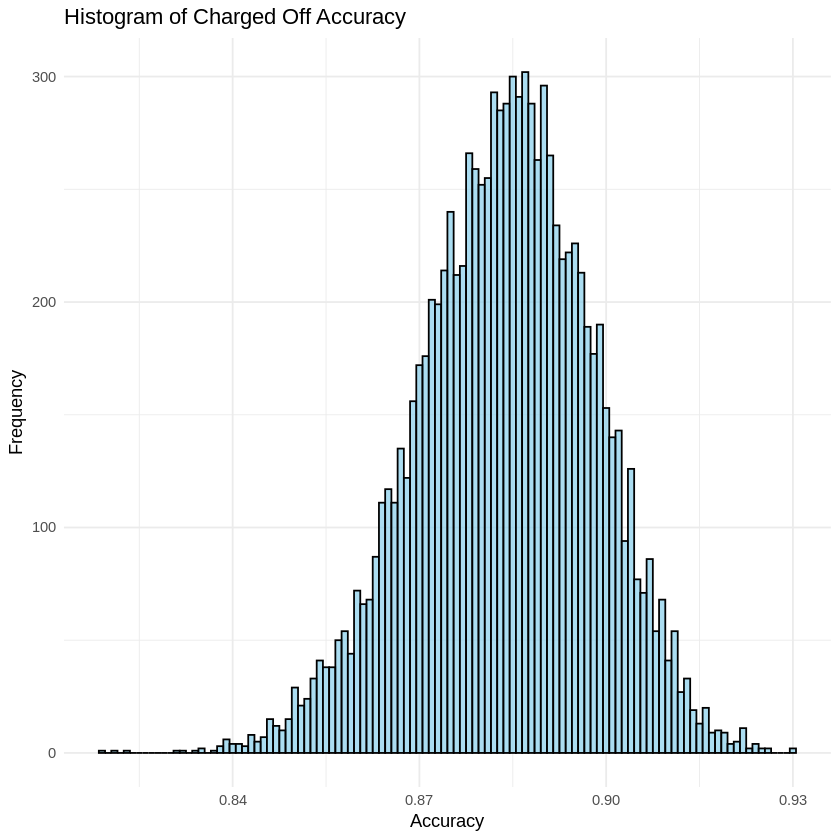

In [47]:

N <- 10000
accuracies <- numeric(N)


calculate_accuracy <- function(model, sample_data) {

  predictions <- predict(model, sample_data, type = "response")

  true_labels <- sample_data$loan_status
  charged_off_accuracy <- mean(predictions == true_labels)

  return(charged_off_accuracy)
}


for (i in 1:N) {
  sample_test_df <- handle_class_imbalance(test_df, "loan_status")

  accuracy <- calculate_accuracy(final_results$model, sample_test_df)

  accuracies[i] <- accuracy
}


ggplot(data.frame(accuracy = accuracies), aes(x = accuracy)) +
  geom_histogram(binwidth = 0.001, fill = "skyblue", color = "black", alpha = 0.7) +
  labs(title = "Histogram of Charged Off Accuracy", x = "Accuracy", y = "Frequency") +
  theme_minimal()

In [33]:
#Prediction

calculate_loan_outcomes <- function(model, predict_df) {

  predictions <- predict(model, predict_df, type = "response")

  outcome_counts <- table(predictions)

  charged_off_count <- if ("Charged Off" %in% names(outcome_counts)) outcome_counts["Charged Off"] else 0
  fully_paid_count <- if ("Fully Paid" %in% names(outcome_counts)) outcome_counts["Fully Paid"] else 0

  return(list(
    Charged_Off = charged_off_count,
    Fully_Paid = fully_paid_count
  ))
}

results <- calculate_loan_outcomes(final_results$model, predict_df)
cat("Predicting Charged Off % from 2015 to 2018 Active/Current loans: \n")
cat("Total Charged Off:", results$Charged_Off, "(", (results$Charged_Off/(results$Charged_Off + results$Fully_Paid))*100, "% )\n")
cat("Total Fully Paid:", results$Fully_Paid,"(", (results$Fully_Paid/(results$Charged_Off + results$Fully_Paid))*100, "% )\n")


Predicting Charged Off % from 2015 to 2018 Active/Current loans: 
Total Charged Off: 199012 ( 23.04412 % )
Total Fully Paid: 664601 ( 76.95588 % )


Predicting Charged Off % from 2015 to 2018 Active/Current loans: 
Total Charged Off: 114968 ( 13.31244 % )
Total Fully Paid: 748645 ( 86.68756 % )


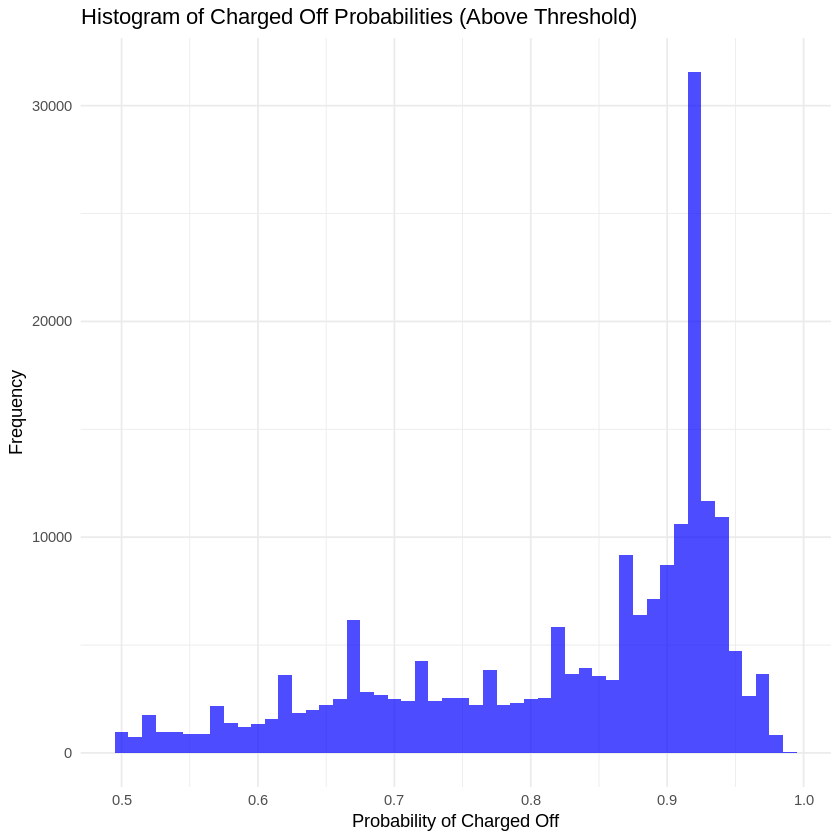

In [34]:
#Visuals for the prediction

library(ggplot2)

calculate_loan_outcomes_with_probs <- function(model, predict_df, threshold = 0.5) {

  prob_predictions <- predict(model, predict_df, type = "prob")

  charged_off_probs <- prob_predictions[, "Charged Off"]

  predictions <- ifelse(charged_off_probs >= threshold, "Charged Off", "Fully Paid")

  outcome_counts <- table(predictions)

  charged_off_count <- if ("Charged Off" %in% names(outcome_counts)) outcome_counts["Charged Off"] else 0
  fully_paid_count <- if ("Fully Paid" %in% names(outcome_counts)) outcome_counts["Fully Paid"] else 0

  return(list(
    Charged_Off = charged_off_count,
    Fully_Paid = fully_paid_count,
    Charged_Off_Probs = charged_off_probs
  ))
}

results <- calculate_loan_outcomes_with_probs(final_results$model, predict_df, .85)

filtered_probs <- results$Charged_Off_Probs[results$Charged_Off_Probs >= 0.5]

cat("Predicting Charged Off % from 2015 to 2018 Active/Current loans: \n")
cat("Total Charged Off:", results$Charged_Off, "(", (results$Charged_Off / (results$Charged_Off + results$Fully_Paid)) * 100, "% )\n")
cat("Total Fully Paid:", results$Fully_Paid, "(", (results$Fully_Paid / (results$Charged_Off + results$Fully_Paid)) * 100, "% )\n")


ggplot(data.frame(Charged_Off_Probs = filtered_probs), aes(x = Charged_Off_Probs)) +
  geom_histogram(binwidth = 0.01, fill = "blue", alpha = 0.7) +
  labs(
    title = "Histogram of Charged Off Probabilities (Above Threshold)",
    x = "Probability of Charged Off",
    y = "Frequency"
  ) +
  theme_minimal()
